In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import pandas as pd
import math

In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = Dataset('/content/drive/MyDrive/Data Science/nasa.nc4', mode='r')

In [ ]:
data #metadata information

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Fri Dec 17 16:02:55 2021 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_flx_Nx.20211201.nc4
    Filename: MERRA2_400.tavg1_2d_flx_Nx.20211201.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXFLX
    GranuleID: MERRA2_400.tavg1_2d_flx_Nx.20211201.nc4
    ProductionDateTime: Original file generated: Fri Dec 17 16:02:55 2021 GMT
    LongName: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Surface Flux Diagnostics
    Title: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Surface Flux Diagnostics
    SouthernmostLatitude: -90.0


In [ ]:
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']

# wind speed
speed = data.variables['SPEED']


In [ ]:
len(lons[:])

576

In [ ]:
speed[1,:,:].shape[0]

361

In [ ]:
len(lats[:])

361

In [ ]:
len(data['time'][:])

<ipython-input-13-94b13d7bc82d>:1: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  len(data['time'][:])


24

In [ ]:
# average hourly windspeed  as daily windspeed
speed_daily = speed[:].data.mean(axis=0) 

In [ ]:
speed_daily.shape

(361, 576)

In [ ]:
#extract wind speed data to dataframe
longitude_values = list(lons[:].data)*361
latitude_values = np.repeat(lats[:].data, 576)
speed_values = speed_daily.flatten()

df = pd.DataFrame({"lon": longitude_values, "lat": latitude_values, "speed": speed_values})

df.head()


,lon,lat,speed
0,-180.000,-90.0,4.57525
1,-179.375,-90.0,4.57525
2,-178.750,-90.0,4.57525
3,-178.125,-90.0,4.57525
4,-177.500,-90.0,4.57525


In [ ]:
# import geopy
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((df[lat_field], df[lon_field]))
#     return location.raw['address']['postcode']


# geolocator = geopy.Nominatim(user_agent="http")


# zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='lat', lon_field='lon')

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.describe()

,lon,lat,speed
count,207936.000000,2.079360e+05,207936.000000
mean,-0.312500,0.000000e+00,8.007416
std,103.923142,5.210579e+01,3.802130
min,-180.000000,-9.000000e+01,0.759032
25%,-90.156250,-4.500000e+01,5.223871
50%,-0.312500,-1.797510e-13,7.427829
75%,89.531250,4.500000e+01,10.139867
max,179.375000,9.000000e+01,29.306778


In [ ]:
longitude_values

[-180.0,
 -179.375,
 -178.75,
 -178.125,
 -177.5,
 -176.875,
 -176.25,
 -175.625,
 -175.0,
 -174.375,
 -173.75,
 -173.125,
 -172.5,
 -171.875,
 -171.25,
 -170.625,
 -170.0,
 -169.375,
 -168.75,
 -168.125,
 -167.5,
 -166.875,
 -166.25,
 -165.625,
 -165.0,
 -164.375,
 -163.75,
 -163.125,
 -162.5,
 -161.875,
 -161.25,
 -160.625,
 -160.0,
 -159.375,
 -158.75,
 -158.125,
 -157.5,
 -156.875,
 -156.25,
 -155.625,
 -155.0,
 -154.375,
 -153.75,
 -153.125,
 -152.5,
 -151.875,
 -151.25,
 -150.625,
 -150.0,
 -149.375,
 -148.75,
 -148.125,
 -147.5,
 -146.875,
 -146.25,
 -145.625,
 -145.0,
 -144.375,
 -143.75,
 -143.125,
 -142.5,
 -141.875,
 -141.25,
 -140.625,
 -140.0,
 -139.375,
 -138.75,
 -138.125,
 -137.5,
 -136.875,
 -136.25,
 -135.625,
 -135.0,
 -134.375,
 -133.75,
 -133.125,
 -132.5,
 -131.875,
 -131.25,
 -130.625,
 -130.0,
 -129.375,
 -128.75,
 -128.125,
 -127.5,
 -126.875,
 -126.25,
 -125.625,
 -125.0,
 -124.375,
 -123.75,
 -123.125,
 -122.5,
 -121.875,
 -121.25,
 -120.625,
 -120.0,
 -119.3

In [ ]:
len(speed_values)

207936

In [ ]:
len(longitude_values)

207936

In [ ]:
len(latitude_values)

207936

In [ ]:
len(speed[1,1,:].data)

576

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Science/Power_Plants.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,8,9,10,13,14,17,18,19,20,21,22,23,24,25,34,35,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df2.head()

,X,Y,OBJECTID,PLANT_CODE,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,...,SUB_1,SUB_2,LINES,SOURCE_LAT,SOURC_LONG,GlobalID,CreationDate,Creator,EditDate,Editor
0,-1.361831e+07,5.157821e+06,188,294,COPCO 1,COPCO RD 20 MI EAST OF I5,HORNBROOK,CA,96044,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,0.0,41.978914,-122.335317,{FD7408A0-3F2E-4D4A-84D4-D06C22002E1B},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
1,-1.362084e+07,5.157343e+06,189,295,COPCO 2,19305 DAGGETT ROAD,HORNBROOK,CA,96044,NOT AVAILABLE,...,COPCO 2,NOT AVAILABLE,0.0,41.975716,-122.358127,{491F1438-9905-40C3-8561-741E4CD78C37},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
2,-1.362960e+07,5.150946e+06,191,297,IRON GATE,COPCO RD 9 MI EAST OF I5,HORNBROOK,CA,96044,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,0.0,41.932981,-122.436780,{5B9E0FBC-43FB-460D-8187-FD55042EB501},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
3,-1.256280e+07,4.648705e+06,193,299,BLUNDELL,10 MI EAST OF HIGHWAY 257,MILFORD,UT,84751,NOT AVAILABLE,...,BLUNDELL,NOT AVAILABLE,1.0,38.488771,-112.853591,{5FF77F2B-41AD-478A-9FF3-37D04737CE25},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
4,-1.241182e+07,5.477623e+06,548,825,ASHTON,1338 N 3300 E,ASHTON,ID,83420,NOT AVAILABLE,...,UNKNOWN204720,NOT AVAILABLE,1.0,44.078656,-111.497266,{DF869347-58EA-4E2F-8C0F-89ACE845E63F},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD


In [ ]:
df2['LATITUDE']

0        41.978914
1        41.975716
2        41.932981
3        38.488771
4        44.078656
           ...    
83000          NaN
83001          NaN
83002          NaN
83003          NaN
83004          NaN
Name: LATITUDE, Length: 83005, dtype: float64

In [ ]:
df2['LONGITUDE']

0       -122.335317
1       -122.358127
2       -122.436780
3       -112.853591
4       -111.497266
            ...    
83000           NaN
83001           NaN
83002           NaN
83003           NaN
83004           NaN
Name: LONGITUDE, Length: 83005, dtype: float64

In [ ]:
# find nearest longitude or latitude
def find_nearest(speed_l, df_l, resolution):
    for i in range(len(df_l)):
        if (np.isnan(df_l[i])== False):
            for j in speed_l:
                if (abs(df_l[i]-j) <= resolution):
                    df_l[i] = j
                    break
    return df_l

In [ ]:
df2_lon = find_nearest(list(lons[:].data),df2['LONGITUDE'],0.625)

<ipython-input-29-771cf2b652b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l[i] = j


In [ ]:
df2['LONGITUDE'] = df2_lon

In [ ]:
df2_lat = find_nearest(list(lats[:].data),df2['LATITUDE'],0.5)

<ipython-input-29-771cf2b652b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l[i] = j


In [ ]:
df2['LATITUDE'] = df2_lat

In [ ]:
df2_transform = df2[['LONGITUDE','LATITUDE','OPER_CAP','COAL_USED','NGAS_USED','OIL_USED']]
df2_transform.head()

,LONGITUDE,LATITUDE,OPER_CAP,COAL_USED,NGAS_USED,OIL_USED
0,-122.500,41.5,26.0,0.0,0.0,0.0
1,-122.500,41.5,36.0,0.0,0.0,0.0
2,-122.500,41.5,19.0,0.0,0.0,0.0
3,-113.125,38.0,44.8,0.0,0.0,0.0
4,-111.875,44.0,6.7,0.0,0.0,0.0


In [ ]:
final_df = pd.merge(df,df2_transform, left_on=['lon','lat'], right_on = ['LONGITUDE','LATITUDE'], how='right')

In [ ]:
final_df.head()

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,COAL_USED,NGAS_USED,OIL_USED
0,-122.500,41.5,4.161290,-122.500,41.5,26.0,0.0,0.0,0.0
1,-122.500,41.5,4.161290,-122.500,41.5,36.0,0.0,0.0,0.0
2,-122.500,41.5,4.161290,-122.500,41.5,19.0,0.0,0.0,0.0
3,-113.125,38.0,5.384007,-113.125,38.0,44.8,0.0,0.0,0.0
4,-111.875,44.0,6.046074,-111.875,44.0,6.7,0.0,0.0,0.0


In [ ]:
len(final_df)

83005

In [ ]:
final_df.isnull().sum()

lon          2314
lat          2314
speed        2314
LONGITUDE    2314
LATITUDE     2314
OPER_CAP     2314
COAL_USED    2314
NGAS_USED    2314
OIL_USED     2314
dtype: int64

In [ ]:
final_df

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,COAL_USED,NGAS_USED,OIL_USED
0,-122.500,41.5,4.161290,-122.500,41.5,26.0,0.0,0.0,0.0
1,-122.500,41.5,4.161290,-122.500,41.5,36.0,0.0,0.0,0.0
2,-122.500,41.5,4.161290,-122.500,41.5,19.0,0.0,0.0,0.0
3,-113.125,38.0,5.384007,-113.125,38.0,44.8,0.0,0.0,0.0
4,-111.875,44.0,6.046074,-111.875,44.0,6.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
83000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Check the missing values in the dataset
final_df.isnull().sum()

lon          2314
lat          2314
speed        2314
LONGITUDE    2314
LATITUDE     2314
OPER_CAP     2314
COAL_USED    2314
NGAS_USED    2314
OIL_USED     2314
dtype: int64

In [ ]:
final1=final_df.dropna()

In [ ]:
final1.isnull().sum()

lon          0
lat          0
speed        0
LONGITUDE    0
LATITUDE     0
OPER_CAP     0
COAL_USED    0
NGAS_USED    0
OIL_USED     0
dtype: int64

In [ ]:
cols = ['OPER_CAP','OIL_USED','COAL_USED', 'speed','NGAS_USED']
for i in cols:
    mean=np.mean(np.array( pd.to_numeric(final1[i],errors='coerce')))
    std=np.std(np.array( pd.to_numeric(final1[i],errors='coerce')))
    if (std):
        final1[i]= pd.to_numeric(final1[i],errors='coerce').apply(lambda x:(x-mean)/std)

<ipython-input-64-8fc18531cef2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1[i]= pd.to_numeric(final1[i],errors='coerce').apply(lambda x:(x-mean)/std)


In [ ]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-65-cc13b858903d>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


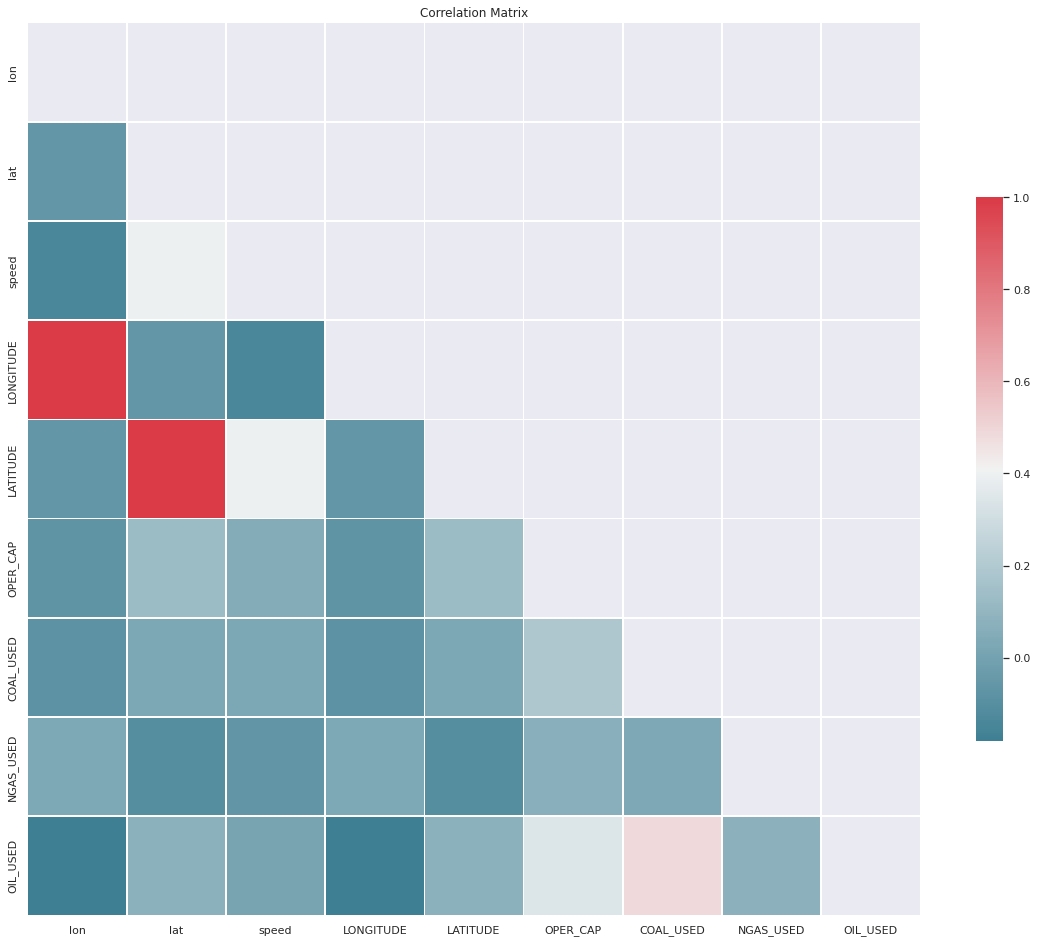

In [ ]:
corr = final1.corr()

#Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

#Generating a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#Drawing the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.title("Correlation Matrix")
plt.show()

<ipython-input-45-e09e10e0f304>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cm , dtype=np.bool)
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


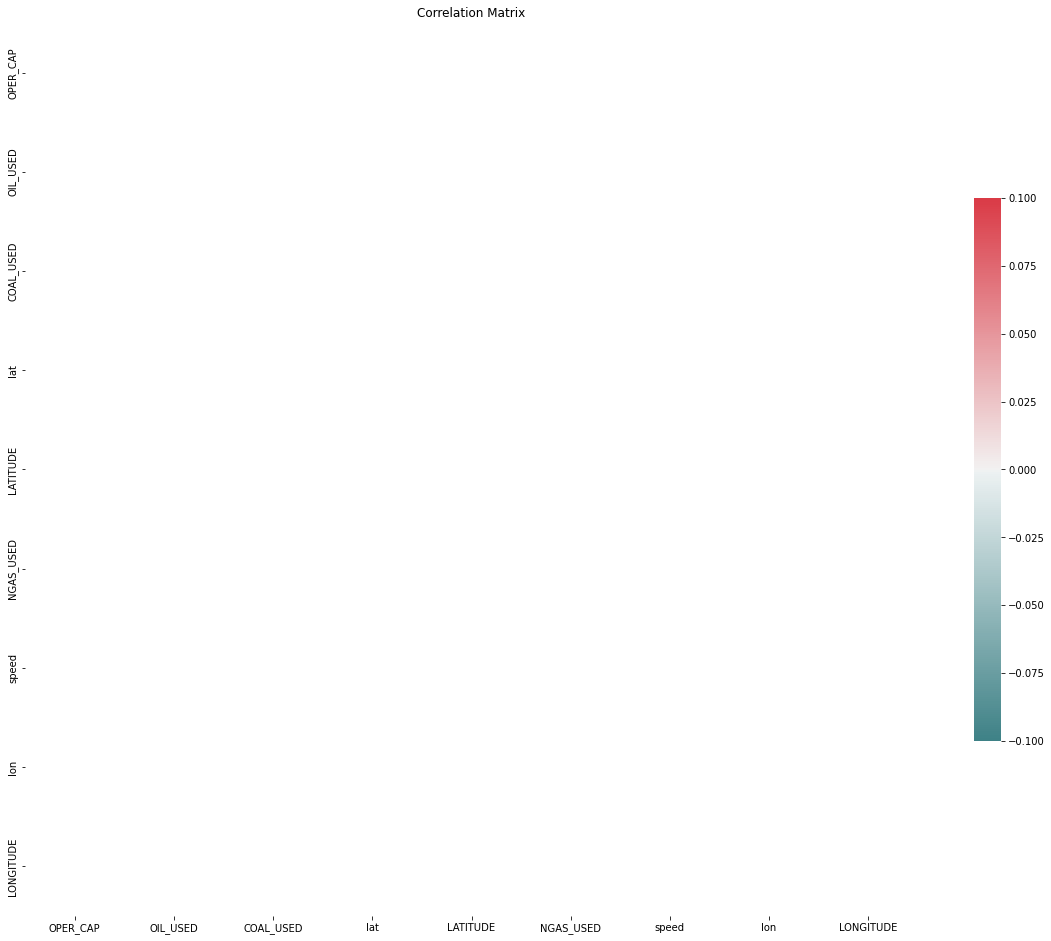

In [ ]:
corrmat = final1.corr()

k  = 15 # diaplay 30 factors
cols = corrmat.nlargest(k,'OPER_CAP')['OPER_CAP'].index
cm = np.corrcoef(final_df[cols].values.T)
#Generating a mask for the upper triangle
mask = np.zeros_like(cm , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

#Generating a custom diverging colormap
cmap = sns.diverging_palette(200,10, as_cmap=True)

#Drawing the heatmap with the mask
sns.heatmap(cm, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.title("Correlation Matrix")
plt.show()


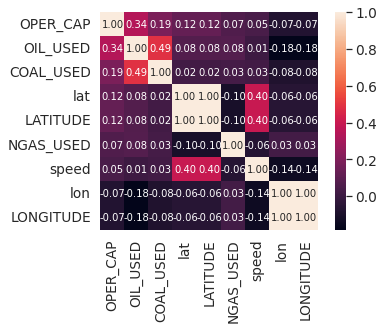

In [ ]:
k  =20 # display 10 factors
cols = corrmat.nlargest(k, 'OPER_CAP')['OPER_CAP'].index
cm = np.corrcoef(final1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<ipython-input-47-074c7158dd18>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cm , dtype=np.bool)


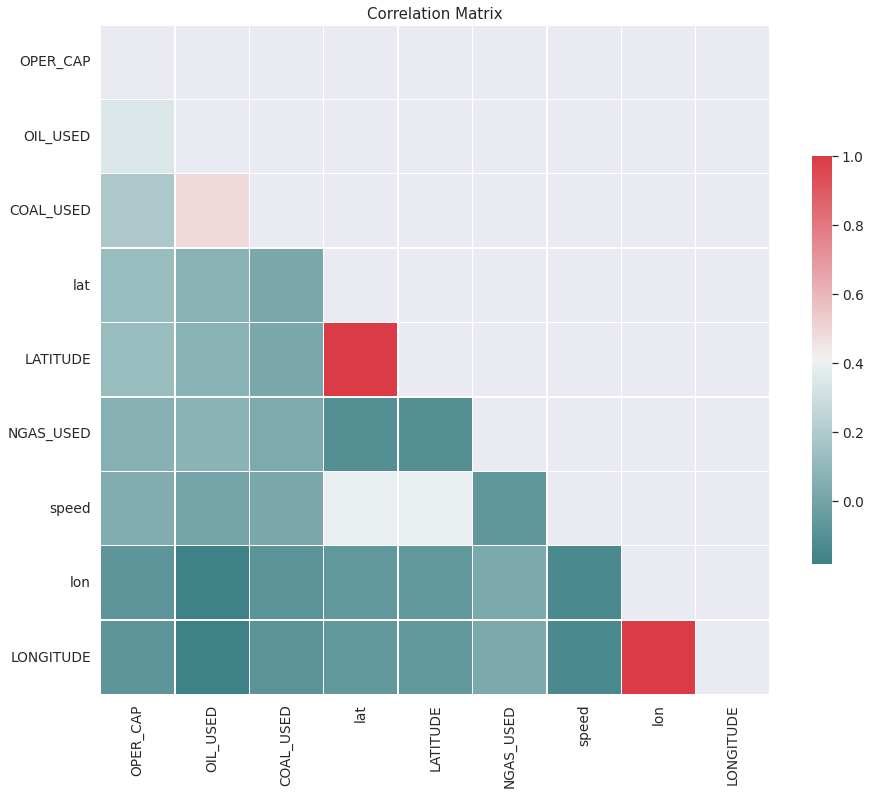

In [ ]:
corrmat = final1.corr()

k  = 30 # diaplay 30 factors
cols = corrmat.nlargest(k,'OPER_CAP')['OPER_CAP'].index
cm = np.corrcoef(final1[cols].values.T)
#Generating a mask for the upper triangle
mask = np.zeros_like(cm , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

#Generating a custom diverging colormap
cmap = sns.diverging_palette(200,10, as_cmap=True)

#Drawing the heatmap with the mask
sns.heatmap(cm, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.title("Correlation Matrix")
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcc5bc028b0> (for post_execute):


KeyboardInterrupt: ignored

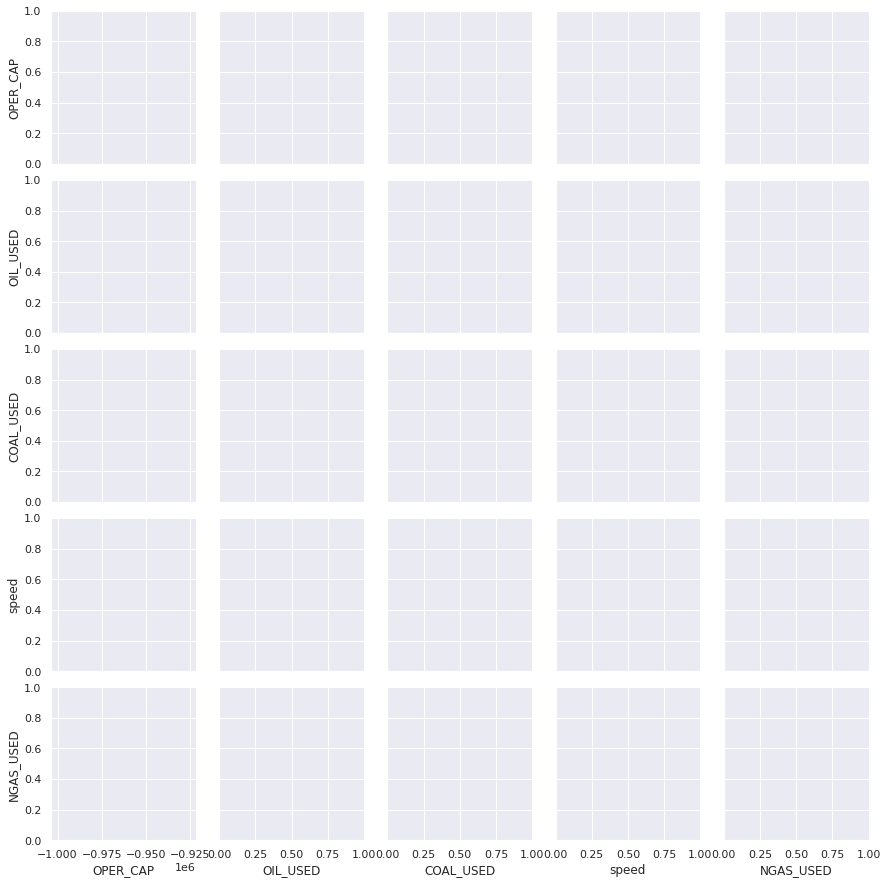

In [ ]:
sns.set()
cols = ['OPER_CAP','OIL_USED','COAL_USED', 'speed','NGAS_USED']
sns.pairplot(final1[cols], size = 2.5)
plt.show()

KeyboardInterrupt: ignored

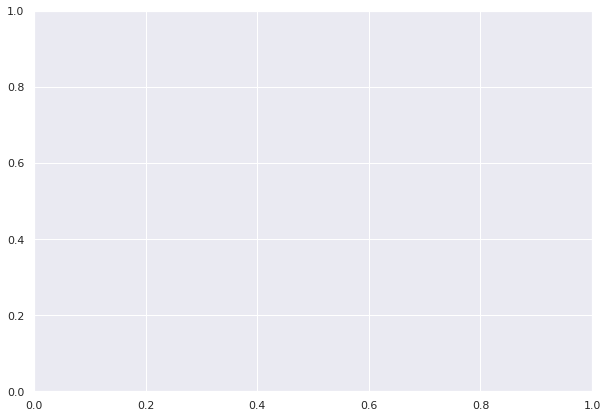

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
cols = ['OPER_CAP','OIL_USED','COAL_USED', 'speed','NGAS_USED']
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(final1[cols])
 
# show plot
plt.show()

KeyError: ignored

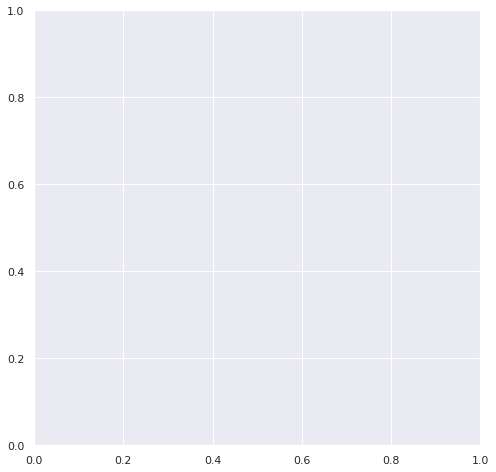

In [ ]:
cols = ['OPER_CAP','OIL_USED','COAL_USED', 'speed','NGAS_USED']
final1.boxplot(column=[cols], showmeans=True, return_type='axes', figsize=(8, 8))
plt.title("OPER_CAP", size=8)
plt.show()

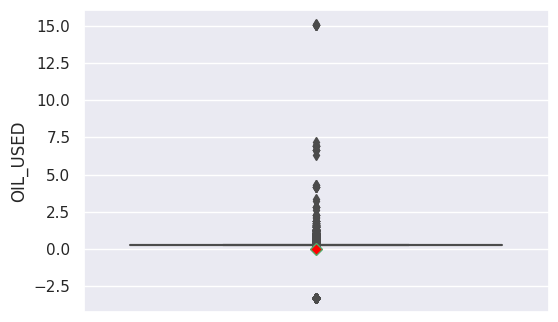

In [ ]:
plt.figure(dpi=100)
sns.boxplot(y=final1['OIL_USED'],
            showmeans=True,#箱图显示均值，
            meanprops = {'marker':'D','markerfacecolor':'red'},#设置均值属性
           )
plt.show()

In [ ]:
final1['OIL_USED'].describe()

count    8.069100e+04
mean    -1.070776e-16
std      1.000006e+00
min     -3.294088e+00
25%      2.854013e-01
50%      2.854013e-01
75%      2.854013e-01
max      1.512695e+01
Name: OIL_USED, dtype: float64

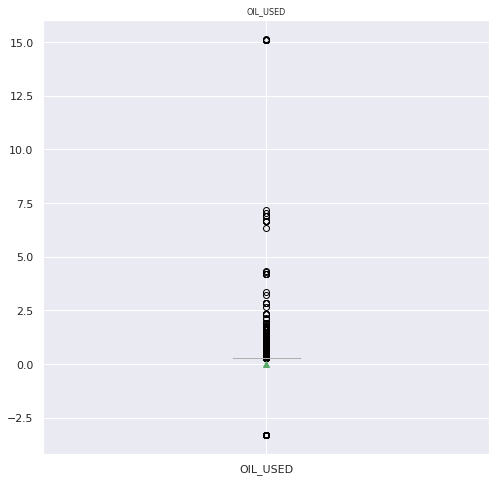

In [ ]:


final1.boxplot(column=['OIL_USED'], showmeans=True, return_type='axes', figsize=(8, 8))
plt.title("OIL_USED", size=8)
plt.show()

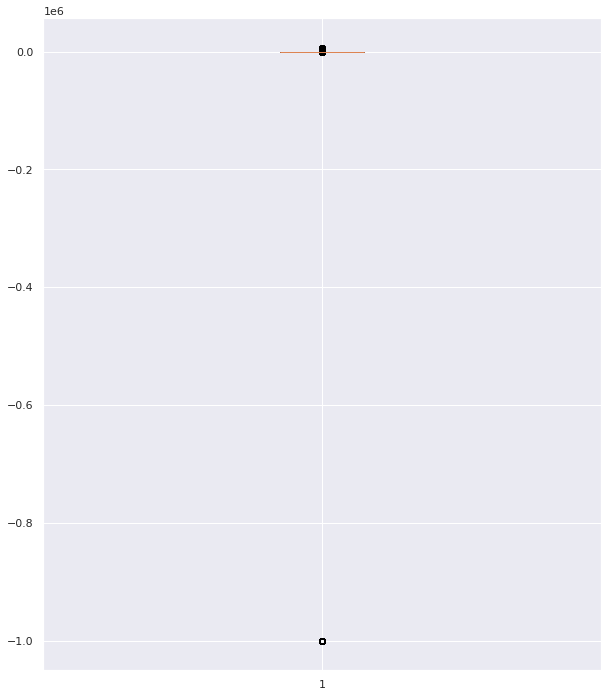

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize =(10,12))
 
# Creating plot
plt.boxplot(final1['OPER_CAP'])
 
# show plot
plt.show()